In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv(r"C:\Users\Locini\Desktop\r\creditcard.csv", encoding='latin-1')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

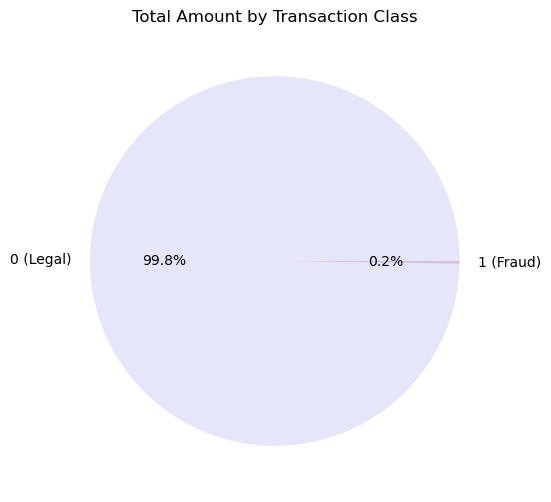

In [11]:
import matplotlib.pyplot as plt

# Group by 'Class' and calculate the sum of 'Amount'
class_totals = df.groupby('Class')['Amount'].sum().reset_index()

# Create a pie chart with lavender colors
plt.figure(figsize=(8, 6))
plt.pie(
    class_totals['Amount'], 
    labels=['0 (Legal)', '1 (Fraud)'], 
    autopct='%1.1f%%', 
    colors=['#E6E6FA', '#D8BFD8']  # Light lavender and Thistle lavender
)
plt.title('Total Amount by Transaction Class')
plt.show()


In [12]:
legal=df[df.Class==0]
fraud=df[df.Class==1]

In [13]:
legal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [16]:
legal_sample=legal.sample(n=492)

In [17]:
legal_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
184515,126275.0,-0.318328,1.155865,-0.069316,0.447741,0.681409,-0.245213,0.930780,-0.712375,0.149324,...,0.413444,1.349980,-0.241761,0.654978,-0.482003,-0.131048,-0.737080,0.063997,10.37,0
25032,33487.0,1.194283,-0.771250,0.226246,-0.481944,-1.236451,-1.333132,-0.246298,-0.311613,-0.862860,...,0.293804,0.515768,-0.162975,0.752401,0.532837,-0.147140,-0.028942,0.031749,119.25,0
202881,134532.0,1.926803,-0.639122,-1.221846,-0.825169,-0.263210,-0.701603,-0.080377,-0.189200,0.883379,...,0.056844,0.222009,0.081163,-0.309339,-0.191989,0.605287,-0.078791,-0.064861,73.43,0
185288,126607.0,-0.080772,0.871082,-0.414355,-0.610309,1.176619,0.030184,0.835586,-0.011137,-0.173487,...,0.105519,0.457221,-0.277624,0.175010,-0.080025,0.532148,-0.093981,0.072234,17.99,0
143288,85251.0,1.230120,-0.371791,1.158336,0.167237,-1.301934,-0.491543,-0.759172,0.093303,1.226088,...,-0.132700,-0.214784,0.076328,0.431537,0.085357,0.994446,-0.038439,0.013179,1.62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63548,50768.0,-1.525007,0.609911,1.773562,0.239279,-0.066184,-0.419671,0.150199,0.679649,-0.434021,...,-0.032836,-0.617580,-0.002550,-0.027560,0.202088,-0.658842,-0.075107,-0.058318,46.95,0
5479,5518.0,1.059967,-0.676380,1.952143,1.099591,-1.311395,1.501026,-1.681297,0.646764,3.198944,...,-0.056620,0.572900,-0.115345,-0.277460,0.290134,0.714155,0.040178,0.002753,4.75,0
46165,42663.0,-0.657536,0.817987,1.406456,-0.348351,-0.618771,-0.797377,0.330765,-0.185265,0.229008,...,0.041246,-0.102401,0.088395,0.408138,-0.913963,0.851991,-0.463285,0.162227,17.67,0
8498,11396.0,1.269787,-0.128044,0.232607,0.121687,-0.012166,0.326797,-0.346641,-0.038688,2.062314,...,-0.290717,-0.304662,-0.151582,-0.832298,0.487774,1.160067,-0.077626,-0.016922,16.50,0


In [18]:
new_df=pd.concat([legal_sample,fraud],axis=0)

In [19]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
184515,126275.0,-0.318328,1.155865,-0.069316,0.447741,0.681409,-0.245213,0.930780,-0.712375,0.149324,...,0.413444,1.349980,-0.241761,0.654978,-0.482003,-0.131048,-0.737080,0.063997,10.37,0
25032,33487.0,1.194283,-0.771250,0.226246,-0.481944,-1.236451,-1.333132,-0.246298,-0.311613,-0.862860,...,0.293804,0.515768,-0.162975,0.752401,0.532837,-0.147140,-0.028942,0.031749,119.25,0
202881,134532.0,1.926803,-0.639122,-1.221846,-0.825169,-0.263210,-0.701603,-0.080377,-0.189200,0.883379,...,0.056844,0.222009,0.081163,-0.309339,-0.191989,0.605287,-0.078791,-0.064861,73.43,0
185288,126607.0,-0.080772,0.871082,-0.414355,-0.610309,1.176619,0.030184,0.835586,-0.011137,-0.173487,...,0.105519,0.457221,-0.277624,0.175010,-0.080025,0.532148,-0.093981,0.072234,17.99,0
143288,85251.0,1.230120,-0.371791,1.158336,0.167237,-1.301934,-0.491543,-0.759172,0.093303,1.226088,...,-0.132700,-0.214784,0.076328,0.431537,0.085357,0.994446,-0.038439,0.013179,1.62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


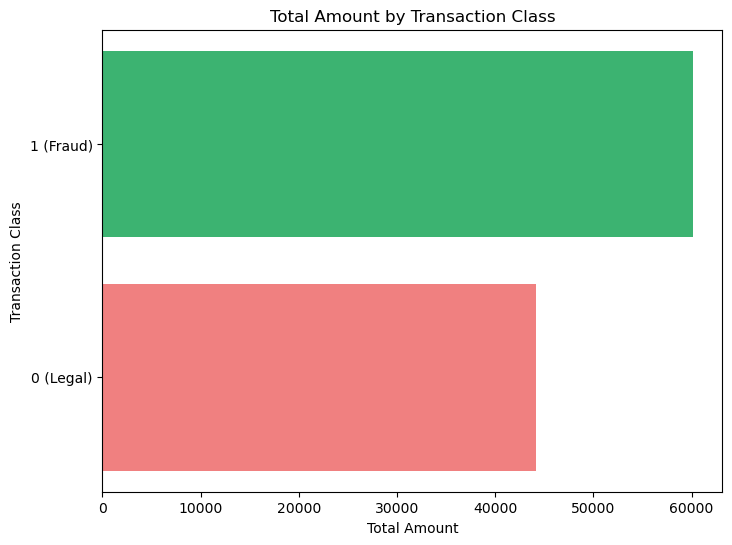

In [20]:
import matplotlib.pyplot as plt

# Group by 'Class' and calculate the sum of 'Amount'
class_total = new_df.groupby('Class')['Amount'].sum().reset_index()

# Create a horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(class_total['Class'].astype(str), class_total['Amount'], color=['lightcoral', 'mediumseagreen'])
plt.xlabel('Total Amount')
plt.ylabel('Transaction Class')
plt.title('Total Amount by Transaction Class')
plt.yticks([0, 1], ['0 (Legal)', '1 (Fraud)'])  # Label the y-axis ticks
plt.show()

In [21]:
X=new_df.drop("Class",axis=1)
Y=new_df.Class

In [22]:
X.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
184515,126275.0,-0.318328,1.155865,-0.069316,0.447741,0.681409,-0.245213,0.930780,-0.712375,0.149324,...,0.201818,0.413444,1.349980,-0.241761,0.654978,-0.482003,-0.131048,-0.737080,0.063997,10.37
25032,33487.0,1.194283,-0.771250,0.226246,-0.481944,-1.236451,-1.333132,-0.246298,-0.311613,-0.862860,...,0.248641,0.293804,0.515768,-0.162975,0.752401,0.532837,-0.147140,-0.028942,0.031749,119.25
202881,134532.0,1.926803,-0.639122,-1.221846,-0.825169,-0.263210,-0.701603,-0.080377,-0.189200,0.883379,...,0.011201,0.056844,0.222009,0.081163,-0.309339,-0.191989,0.605287,-0.078791,-0.064861,73.43
185288,126607.0,-0.080772,0.871082,-0.414355,-0.610309,1.176619,0.030184,0.835586,-0.011137,-0.173487,...,-0.054960,0.105519,0.457221,-0.277624,0.175010,-0.080025,0.532148,-0.093981,0.072234,17.99
143288,85251.0,1.230120,-0.371791,1.158336,0.167237,-1.301934,-0.491543,-0.759172,0.093303,1.226088,...,-0.134698,-0.132700,-0.214784,0.076328,0.431537,0.085357,0.994446,-0.038439,0.013179,1.62


In [23]:
Y.head(5)

184515    0
25032     0
202881    0
185288    0
143288    0
Name: Class, dtype: int64

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [25]:
X_train.shape

(787, 30)

In [26]:
Y_train.shape

(787,)

In [27]:
X_test.shape

(197, 30)

In [28]:
Y_test.shape

(197,)

In [29]:
model=LogisticRegression()

In [33]:
model.fit(X_train,Y_train)

C:\Users\Locini\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [34]:
model.predict(X_test)

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

In [35]:
model.score(X_train,Y_train)

0.9529860228716646

C:\Users\Locini\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Confusion Matrix:
 [[145   5]
 [ 15 131]]
Random Forest Confusion Matrix:
 [[144   6]
 [ 14 132]]

Logistic Regression ROC-AUC Score: 0.9611872146118721
Random Forest ROC-AUC Score: 0.9774657534246576


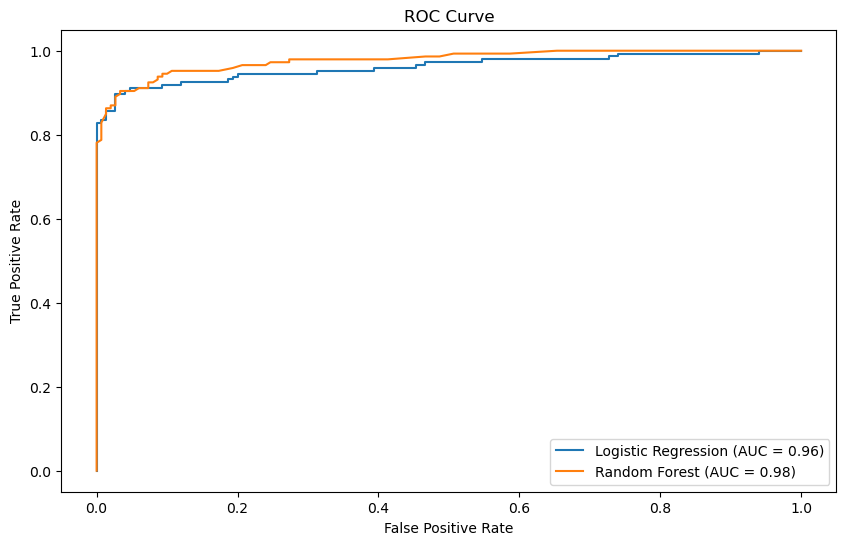

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Sample Data (Assuming you have X and Y defined)
# Replace X, Y with your actual dataset
# X = feature dataframe, Y = target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Define and train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

# Define and train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

# Generate predictions for Logistic Regression and Random Forest
log_reg_pred = log_reg.predict(X_test)
rf_pred = rf.predict(X_test)

# Confusion Matrix for Logistic Regression
log_reg_cm = confusion_matrix(Y_test, log_reg_pred)
print("Logistic Regression Confusion Matrix:\n", log_reg_cm)

# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(Y_test, rf_pred)
print("Random Forest Confusion Matrix:\n", rf_cm)

# ROC-AUC Score
log_reg_roc_auc = roc_auc_score(Y_test, log_reg.predict_proba(X_test)[:, 1])
rf_roc_auc = roc_auc_score(Y_test, rf.predict_proba(X_test)[:, 1])

print("\nLogistic Regression ROC-AUC Score:", log_reg_roc_auc)
print("Random Forest ROC-AUC Score:", rf_roc_auc)

# Plotting the ROC Curve
log_reg_fpr, log_reg_tpr, _ = roc_curve(Y_test, log_reg.predict_proba(X_test)[:, 1])
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(log_reg_fpr, log_reg_tpr, label='Logistic Regression (AUC = {:.2f})'.format(log_reg_roc_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
